In [1]:
import numpy as np
import math
import matplotlib.pyplot  as plt
import pandas as pd
from scipy.optimize import curve_fit
from scipy.stats import expon
import powerlaw
import tqdm
import pickle
import igraph as ig
import leidenalg as la


from util import plotter

# Distribution

/tmp/ipykernel_1286352/2312236069.py:20: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(min(hist), 2)


PM -2.8267095799261392 0.01626362846441113


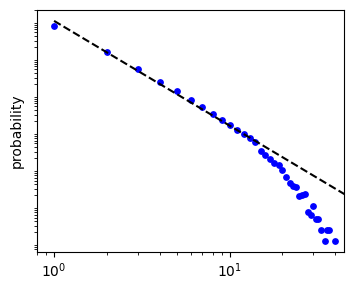

Cli-Md -2.840044162890541 0.2531518463991973


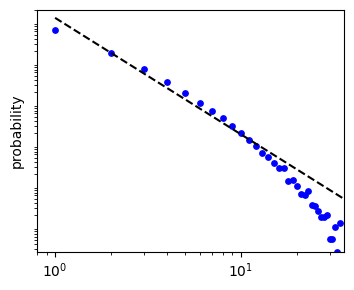

/tmp/ipykernel_1286352/2312236069.py:20: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(min(hist), 2)


Mol-Md -2.87097978308605 0.27358958193567906


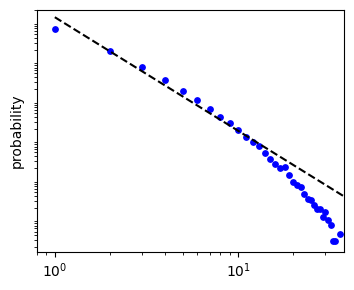

Ch -2.723227905386459 0.09174929842823472


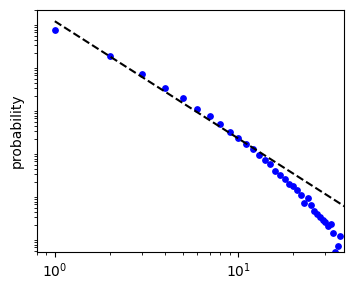

/tmp/ipykernel_1286352/2312236069.py:20: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(min(hist), 2)


Nt -2.9821196347356302 0.20640138142770859


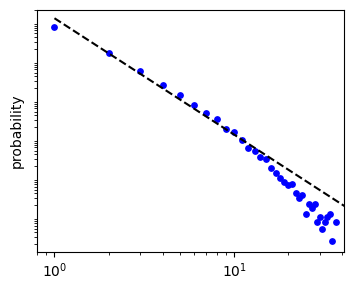

/tmp/ipykernel_1286352/2312236069.py:20: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(min(hist), 2)


CS -3.0512407245415516 0.15810928565461593


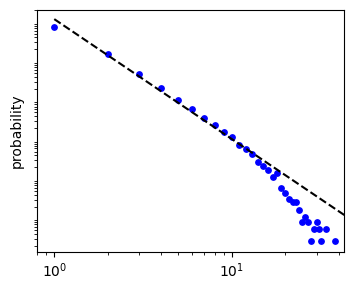

/tmp/ipykernel_1286352/2312236069.py:20: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(min(hist), 2)


Im -2.6682863532279035 0.1532143820290732


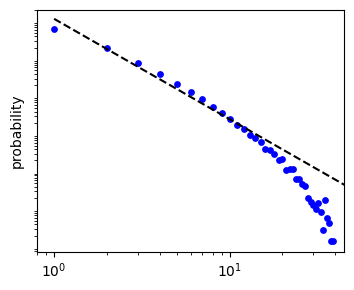

Ne -2.771927243641823 0.18417566769960403


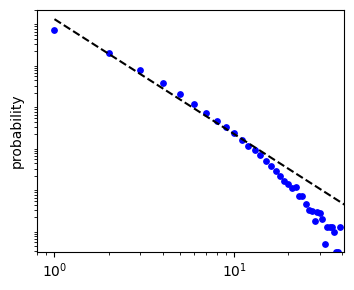

/tmp/ipykernel_1286352/2312236069.py:20: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(min(hist), 2)


EB -2.8088639147987453 0.2550391840878317


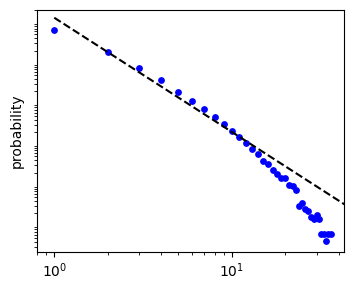

/tmp/ipykernel_1286352/2312236069.py:20: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(min(hist), 2)


So -2.817052129984558 0.2294585065046276


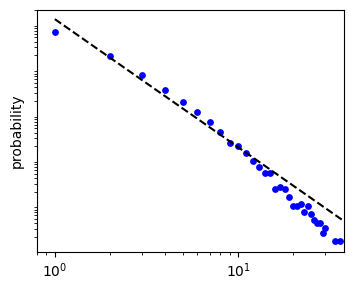

Ps -2.844880019244099 0.2422901153916552


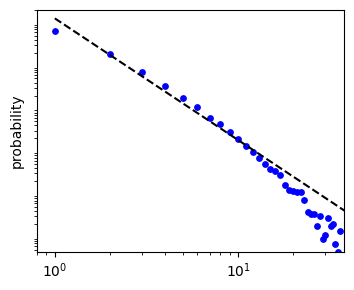

In [44]:
discs = ["PM","Cli-Md","Mol-Md","Ch","Nt","CS","Im","Ne","EB","So","Ps"]

for disc in discs:
    res =pd.read_pickle(f"./result/{disc}_100k.pickle")
    auth = res.groupby("authid")["eid"].nunique()
    auth = auth[auth>3].index
    res = res[res["authid"].isin(auth)]
    data = res[res["year"]>0]["year"]
    bins = [i for i in range(int(min(data)),int(max(data)))]
    bins_plot = np.add(bins,0.5)
    
    plt.figure(figsize=(4,3))
    hist,bins = np.histogram(data, bins=bins)
    hist = hist / len(data)
    plt.scatter(bins[:-1], hist,color="blue",s=15)
    plt.ylabel("probability")
    plt.xscale("log")
    plt.yscale("log")
    plt.xlim(0.9, max(data))
    plt.ylim(min(hist), 2)
    
    plt.tight_layout()
    plt.xlim(0.8)
    
    x_data = np.log(bins[:15])
    y_data = np.log(hist[:15])
    
    # 直線の方程式を定義します
    def linear_func(x, m, b):
        return m * x + b
    
    # 最小二乗法を使用してパラメータをフィットします
    params, covariance = curve_fit(linear_func, x_data, y_data)
    
    # フィットされたパラメータを表示します
    m_fit, b_fit = params
    print(disc, m_fit, b_fit)
    # 確率密度関数を定義します
    def power_law(x, alpha, xmin):
        return math.exp(xmin)*x**alpha
    
    x = np.linspace(min(data), 200, 50)
    plt.plot(x, power_law(x, m_fit,b_fit),'--',c='black', linewidth=1.5, label='Power Law Fit')
    # plt.yticks([10**-2*i for i in range(0,3)])
    # plt.yticks([10**-6, 10**-4, 10**-2, 10**0])
    plt.yticks([])
    plt.show()

/tmp/ipykernel_1286352/4037697866.py:26: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(min(hist), 2)


PM -2.8061351070172997 0.02909880080450885


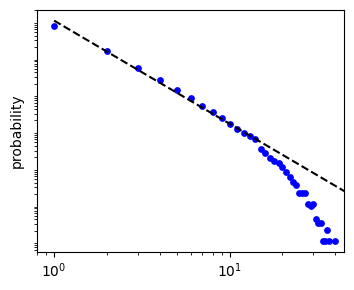

/tmp/ipykernel_1286352/4037697866.py:26: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(min(hist), 2)


Cli-Md -2.7833681962286914 0.24922958242273596


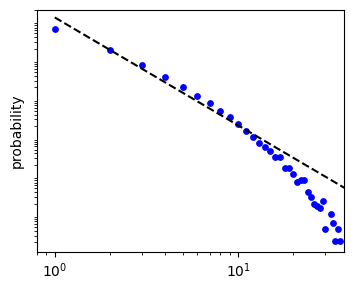

Mol-Md -2.8123118345018234 0.2853981737273324


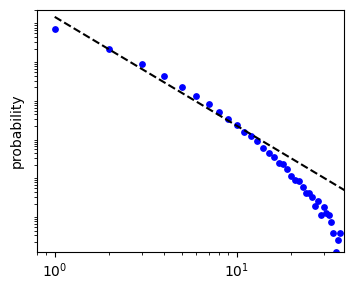

Ch -2.700835007118785 0.10453747122616935


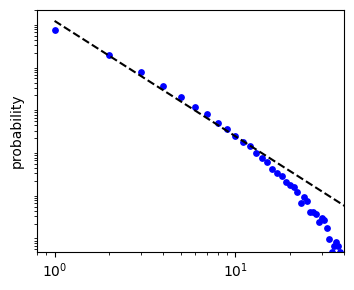

/tmp/ipykernel_1286352/4037697866.py:26: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(min(hist), 2)


Nt -2.958729420189317 0.23446748189018124


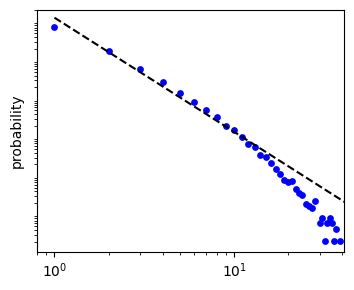

/tmp/ipykernel_1286352/4037697866.py:26: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(min(hist), 2)


CS -2.995233712262431 0.1811329604096741


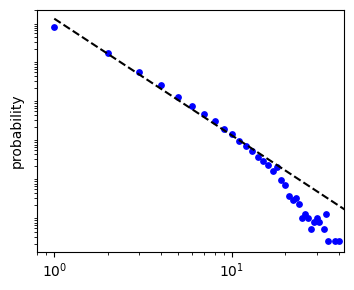

/tmp/ipykernel_1286352/4037697866.py:26: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(min(hist), 2)


Im -2.6370690789163636 0.15812555038329418


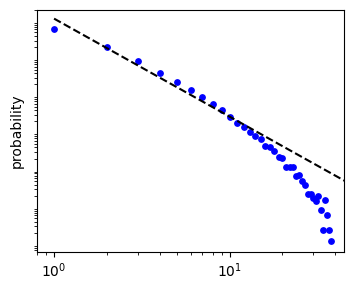

Ne -2.749714404602159 0.20913930237314038


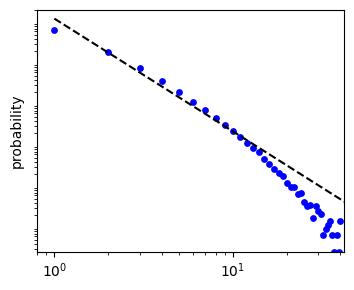

/tmp/ipykernel_1286352/4037697866.py:26: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(min(hist), 2)


EB -2.723659387357422 0.23657600380975272


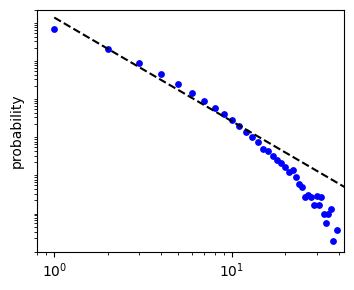

So -2.7377750900318314 0.242374104379295


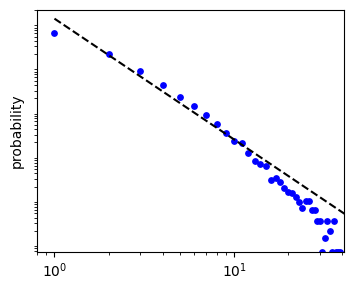

/tmp/ipykernel_1286352/4037697866.py:26: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(min(hist), 2)


Ps -2.844467557874672 0.28528142709233695


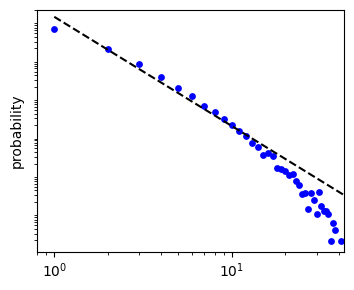

In [87]:
discs = ["PM","Cli-Md","Mol-Md","Ch","Nt","CS","Im","Ne","EB","So","Ps"]
# discs = ["Ch","EB","So","Ps","CS"]
# disc_name={"Ch":"Chemistry","CS":"ComputerScience", "EB":"Environmental Biology", "So": "Social Science", "Ps":"Psychology"}

import time
for disc in discs:
    # disc = discs[0]
    res =pd.read_pickle(f"./result/{disc}_100k.pickle")
    auth = res.groupby("source_authid")["authid"].nunique()
    auth = auth[auth>3].index
    res = res[res["source_authid"].isin(auth)]
    data = res[res["year"]>0]["year"]
    bins = [i for i in range(int(min(data)),int(max(data)))]
    bins_plot = np.add(bins,0.5)
    
    plt.figure(figsize=(4,3))
    hist,bins = np.histogram(data, bins=bins)
    hist = hist / len(data)
    plt.scatter(bins[:-1], hist,color="blue",s=15)
    # plt.title("Coauthorship interval")
    # plt.xlabel(disc_name[disc])
    plt.ylabel("probability")
    plt.xscale("log")
    plt.yscale("log")
    plt.xlim(0.9, max(data))
    plt.ylim(min(hist), 2)
    
    plt.tight_layout()
    plt.xlim(0.8)
    
    x_data = np.log(bins[:15])
    y_data = np.log(hist[:15])
    
    # 直線の方程式を定義します
    def linear_func(x, m, b):
        return m * x + b
    
    # 最小二乗法を使用してパラメータをフィットします
    params, covariance = curve_fit(linear_func, x_data, y_data)
    
    # フィットされたパラメータを表示します
    m_fit, b_fit = params
    print(disc, m_fit, b_fit)
    # 確率密度関数を定義します
    def power_law(x, alpha, xmin):
        return math.exp(xmin)*x**alpha
    
    x = np.linspace(min(data), 200, 50)
    plt.plot(x, power_law(x, m_fit,b_fit),'--',c='black', linewidth=1.5, label='Power Law Fit')
    # plt.yticks([10**-2*i for i in range(0,3)])
    # plt.yticks([10**-6, 10**-4, 10**-2, 10**0])
    plt.yticks([])
    plt.show()
    time.sleep(3)

CS -3 13


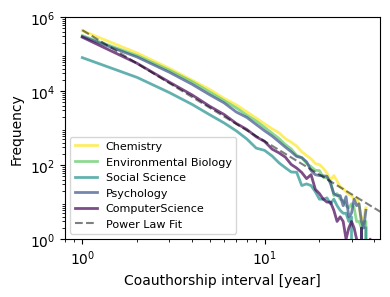

In [47]:
discs = ["Ch","EB","So","Ps","CS"]
disc_name={"Ch":"Chemistry","CS":"ComputerScience", "EB":"Environmental Biology", "So": "Social Science", "Ps":"Psychology"}

plt.figure(figsize=(4,3))
i=0
for disc in discs:
    res =pd.read_pickle(f"./result/{disc}_100k.pickle")
    auth = res.groupby("authid")["eid"].nunique()
    auth = auth[auth>3].index
    res = res[res["authid"].isin(auth)]
    data = res[res["year"]>0]["year"]
    bins = [i for i in range(int(min(data)),int(max(data)))]
    bins_plot = np.add(bins,0.5)
    hist,bins = np.histogram(data, bins=bins)
    # hist = hist / len(data)
    color = plt.cm.viridis((len(discs)-1-i) / (len(discs) - 1))
    plt.plot(bins[:-1], hist,color=color ,linewidth= 2, label=disc_name[disc],alpha=0.7)
    # plt.scatter(bins[:-1], hist,color=color ,s= 15, label=disc_name[disc] ,alpha=0.7)
    # plt.title("Coauthorship interval")
    plt.xlabel("Coauthorship interval [year]")
    plt.ylabel("Frequency")
    plt.xscale("log")
    plt.yscale("log")
    plt.xlim(0.9, max(data))
    plt.ylim(1, max(hist))
    # plt.ylim(min(hist), 2)
    
    plt.tight_layout()
    plt.xlim(0.8)
    i+=1
    
# フィットされたパラメータを表示します
m_fit, b_fit = -3, 13
print(disc, m_fit, b_fit)
# 確率密度関数を定義します
def power_law(x, alpha, xmin):
    return math.exp(xmin)*x**alpha

x = np.linspace(min(data), 200, 50)
plt.plot(x, power_law(x, m_fit,b_fit),'--',c='black', linewidth=1.5, label='Power Law Fit',alpha=0.5)
plt.yticks([10**0, 10**2, 10**4, 10**6])
# plt.yticks([])
plt.legend(fontsize =8)
plt.show()

# Publication year dependence

In [88]:
res = pd.read_pickle("./result/PM_100k.pickle")
auth = res.groupby("authid")["eid"].nunique()
auth = auth[auth>3].index
res = res[res["authid"].isin(auth)]
res = res[res["year"]>0]

year_df = pd.read_pickle("/disks/qnap2/shared/scopus_2022/paper_detail/year.pickle")
year_df

eid
229021      1997
266363      1998
229022      1982
229023      1989
266364      1998
            ... 
26093078    1991
26106279    1991
26093079    1991
26106283    1991
26093080    1991
Name: year, Length: 78887776, dtype: int64

In [89]:
res = pd.merge(res, year_df, how="left", left_on="previous_work", right_on="eid")
res

,authid,year_x,seq,eid,source_authid,previous_work,year_y
0,6508162666,2,2,84869054803,25027822500,7.955162e+10,2010
1,7003534425,2,2,84869054803,25027822500,7.955162e+10,2010
2,8093959400,3,4,80054991861,25027822500,5.264908e+10,2008
3,8093959400,3,3,84908702901,25027822500,8.005499e+10,2011
4,8093959400,1,2,84952863063,25027822500,8.490135e+10,2014
...,...,...,...,...,...,...,...
853499,57213855152,1,1,32118436,35459306800,6.540160e+05,1997
853500,57213855152,1,3,32638439,35459306800,1.106779e+06,1998
853501,57213855152,1,1,12893212,35459306800,3.080790e+05,1999
853502,57213855152,1,2,35953564,35459306800,3.387137e+07,2000


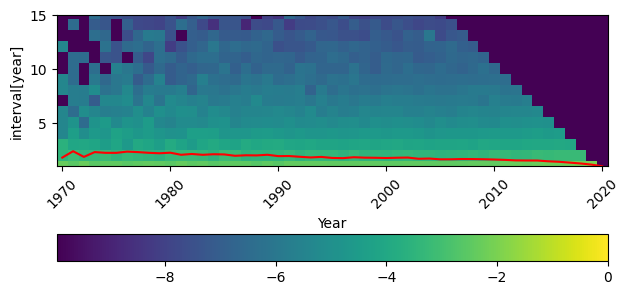

In [158]:
from matplotlib.ticker import FuncFormatter
# plt.figure(figsize=(4,6))
def count(group):
    return np.log(group.value_counts()/group.sum())
pub_year = res.groupby("year_y")["year_x"].apply(count).reset_index(name="count")
pub_mean = res.groupby("year_y")["year_x"].mean()
# pivot_pub_year = pub_year.pivot(index="level_1" ,columns="year_y").fillna(np.min(pub_year["count"]))
# plt.imshow(pivot_pub_year, cmap='viridis', interpolation='nearest')
# plt.plot(pub_mean.index-1970,pub_mean.values, color="red")

 
# plt.xlabel('Year') 
# plt.ylabel('interval[year]')  
# years = [c[1] for c in pivot_pub_year.columns]
# plt.xticks(range(0, len(years), 10), years[::10], rotation=45)
# plt.gca().invert_yaxis()

# # Define formatter for colorbar ticks
# cbar = plt.colorbar(orientation='horizontal')
# formatter = FuncFormatter(lambda x, _: r'$10^{%d}$' % x)
# cbar.ax.yaxis.set_major_formatter(formatter)

# plt.ylim(1,15)
# plt.tight_layout()
# plt.show()

# Size - Interval

In [16]:
res = pd.read_pickle("./result/PM_100k.pickle")
auth = res.groupby("authid")["eid"].nunique()
auth = auth[auth>3].index
res = res[res["authid"].isin(auth)]

In [18]:
authors_valid = pd.read_pickle("./result/authors_valid_PM.pickle")
author_size = authors_valid[["authid","eid"]].groupby(by="eid").nunique()
author_size

,authid
eid,
122,4
129,5
137,4
153,5
157,6
...,...
85131840147,2
85131840674,6
85131841569,3


In [19]:
res = res[res["year"]>0]
res_unique_eid = res[["eid","year"]].groupby(by= "eid").mean()
res_unique_eid

,year
eid,
224,1.500000
229,1.000000
836,1.000000
1761,1.500000
1762,1.000000
...,...
85131678676,1.000000
85131693238,3.333333
85131789781,1.000000


In [20]:
size_year = pd.merge(res_unique_eid,author_size, how="left", on="eid")
size_year

,year,authid
eid,,
224,1.500000,4
229,1.000000,4
836,1.000000,2
1761,1.500000,6
1762,1.000000,3
...,...,...
85131678676,1.000000,7
85131693238,3.333333,12
85131789781,1.000000,5


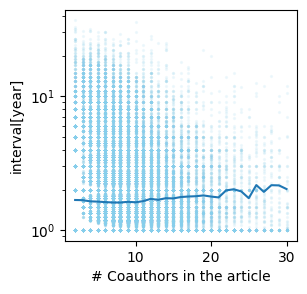

In [121]:
plt.figure(figsize=(3,3))
plt.scatter(size_year["authid"],size_year["year"],color="skyblue",s=2,alpha=0.1)
plt.plot(size_year.groupby("authid")["year"].mean())
plt.xlabel("# Coauthors in the article")
plt.ylabel("interval[year]")
# plt.xscale("log")
plt.yscale("log")
plt.show()

# Interval - Size

In [3]:
res = pd.read_pickle("./result/PM_100k.pickle")
auth = res.groupby("authid")["eid"].nunique()
auth = auth[auth>3].index
res = res[res["authid"].isin(auth)]

In [5]:
authors_valid = pd.read_pickle("./result/authors_valid_PM.pickle")
author_size = authors_valid[["authid","eid"]].groupby(by="eid").nunique()
author_size

,authid
eid,
122,4
129,5
137,4
153,5
157,6
...,...
85131840147,2
85131840674,6
85131841569,3


In [6]:
res_size = pd.merge(res,author_size, how="left", on="eid")
res_size

,authid_x,year,seq,eid,source_authid,previous_work,authid_y
0,7005978840,0,1,84865749083,22834960500,8.486580e+10,2
1,6508162666,0,1,79551623906,25027822500,7.795643e+10,14
2,6508162666,2,2,84869054803,25027822500,7.955162e+10,9
3,7003534425,0,1,79551623906,25027822500,7.795643e+10,14
4,7003534425,2,2,84869054803,25027822500,7.955162e+10,9
...,...,...,...,...,...,...,...
2149668,57213855152,0,2,35845973,35459306800,3.568201e+07,3
2149669,57213855152,0,1,34848439,35459306800,3.584597e+07,3
2149670,57213855152,0,2,34832264,35459306800,3.484844e+07,7
2149671,57213855152,0,2,20557,35459306800,3.483226e+07,3


In [7]:
year_size = res_size[["year","authid_y"]].groupby(by="year").mean()
year_size["bottom"] = res_size[["year","authid_y"]].groupby(by="year").quantile(0.025)
year_size["top"] = res_size[["year","authid_y"]].groupby(by="year").quantile(0.975)
year_size["bottom_error"] =  year_size["authid_y"] - year_size["bottom"]
year_size["top_error"] =  year_size["top"] - year_size["authid_y"]

year_size

,authid_y,bottom,top,bottom_error,top_error
year,,,,,
0,7.552916,3.000,17.000,4.552916,9.447084
1,7.521034,3.000,17.000,4.521034,9.478966
2,7.420234,2.000,18.000,5.420234,10.579766
3,7.353942,2.000,18.000,5.353942,10.646058
4,7.576833,2.000,19.000,5.576833,11.423167
5,7.555535,2.000,19.000,5.555535,11.444465
6,7.565904,2.000,19.000,5.565904,11.434096
7,7.572464,3.000,19.000,4.572464,11.427536
8,7.455266,2.000,18.000,5.455266,10.544734


<ErrorbarContainer object of 3 artists>

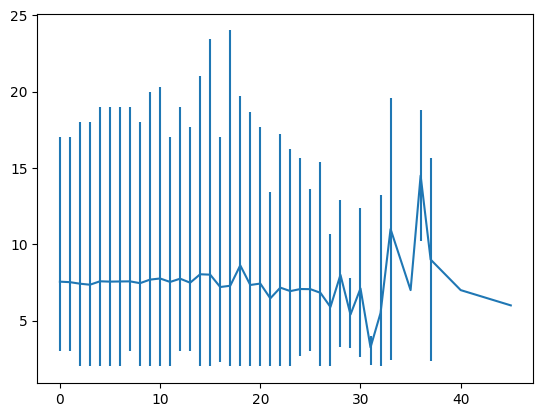

In [14]:
# y_error = year_size.loc[:15,["bottom_error","top_error"]].values.T
y_error = year_size[["bottom_error","top_error"]].values.T

# plt.errorbar(year_size.loc[:15].index, year_size.loc[:15,"authid_y"],y_error)
plt.errorbar(year_size.index, year_size["authid_y"],y_error)


# Coauth persistence

In [92]:
res = pd.read_pickle("./result/PM_100k.pickle")
auth = res.groupby("source_authid")["eid"].nunique()
auth = auth[auth>3].index
res = res[res["source_authid"].isin(auth)]
res

,authid,year,seq,eid,source_authid,previous_work
1,6506350501,0,1,79551623906,25027822500,7.795643e+10
3,6508162666,0,1,79551623906,25027822500,7.795643e+10
4,6508162666,2,2,84869054803,25027822500,7.955162e+10
7,7003534425,0,1,79551623906,25027822500,7.795643e+10
8,7003534425,2,2,84869054803,25027822500,7.955162e+10
...,...,...,...,...,...,...
471,57213855152,0,2,35845973,35459306800,3.568201e+07
472,57213855152,0,1,34848439,35459306800,3.584597e+07
473,57213855152,0,2,34832264,35459306800,3.484844e+07
474,57213855152,0,2,20557,35459306800,3.483226e+07


In [93]:
def count_persistence(group):
  return group["authid"].value_counts()
persistence = res.groupby("source_authid").apply(count_persistence)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


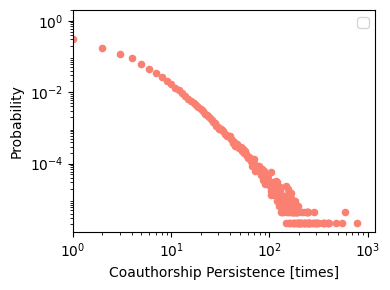

In [96]:
plt.figure(figsize=(4,3))
plotter(persistence.values, count="probability", xlabel="Coauthorship Persistence", u="times",c="salmon", title="")
plt.yticks([10**(-4),10**(-2),10**0])
print()

# Persistence to average interval

In [99]:
res_ = res.reset_index()
res_["authseq"] = res_.groupby("authid").cumcount()
res_

,index,authid,year,seq,eid,source_authid,previous_work,authseq
0,1,6506350501,0,1,79551623906,25027822500,7.795643e+10,0
1,3,6508162666,0,1,79551623906,25027822500,7.795643e+10,0
2,4,6508162666,2,2,84869054803,25027822500,7.955162e+10,1
3,7,7003534425,0,1,79551623906,25027822500,7.795643e+10,0
4,8,7003534425,2,2,84869054803,25027822500,7.955162e+10,1
...,...,...,...,...,...,...,...,...
2340479,471,57213855152,0,2,35845973,35459306800,3.568201e+07,45
2340480,472,57213855152,0,1,34848439,35459306800,3.584597e+07,46
2340481,473,57213855152,0,2,34832264,35459306800,3.484844e+07,47
2340482,474,57213855152,0,2,20557,35459306800,3.483226e+07,48


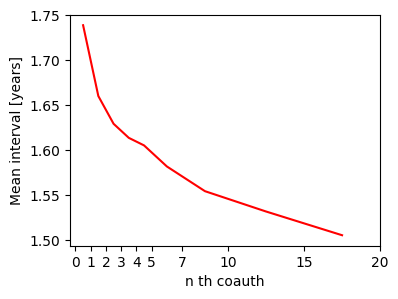

In [107]:
bins = np.array([0,1,2,3,4,5,7,10,15,20])

# hist = [res_.query(f"authseq>={bins[i]} and authseq<{bins[i+1]}")["year"].quantile(q=[0.975,0.025]) for i in range(len(bins)-1)]
hist_median = [res_.query(f"authseq>={bins[i]} and authseq<{bins[i+1]} and year>0")["year"].mean() for i in range(len(bins)-1)]
# hist_std = [res_.query(f"authseq>={bins[i]} and authseq<{bins[i+1]} and year>0")["year"].std() for i in range(len(bins)-1)]

bins_plot = (bins[:-1]+bins[1:])/2

plt.figure(figsize=(4,3))

# hist = pd.DataFrame(hist,index=bins)
# plt.fill_between(bins_plot, hist[0.975],hist[0.025], color='salmon', alpha=0.3)
plt.plot(bins_plot, hist_median, color="red",label="mean interval")
# plt.errorbar(bins, hist_median,yerr=hist_std, color="red",label="mean interval")

# plt.legend()
# plt.title(f'mean interval')
plt.xticks(bins)
plt.xlabel(f'n th coauth')
plt.ylabel('Mean interval [years]')

plt.show()

# Coauthorship Cluster

In [181]:
discs = ["PM","Cli-Md","Mol-Md","Ch","Nt","CS","Im","Ne","EB","So","Ps"]

# for disc in discs:
disc = discs[0]
G=nx.Graph()
for year in  tqdm.tqdm(range(1970, 1990)):
    with open(f'./result/coauth_pair_{disc}_{year}.pickle', 'rb') as f:
        coauth_pair = pickle.load(f)
    G.add_edges_from(coauth_pair)


100%|███████████████████████████████████████████| 20/20 [00:05<00:00,  3.72it/s]


In [2]:
import igraph as ig
import leidenalg as la

# create a graph
g = ig.Graph.Famous('Zachary')

# let's assume that we have some weights
weights = [1, 2, 3, 1, 2, 3, 1, 2, 3]
# weights = [i for i in range(30)]

# but we don't consider them in clustering
part = la.find_partition(g, la.ModularityVertexPartition)

# print the clusters
for cluster in part:
    print(cluster)

[8, 9, 14, 15, 18, 20, 22, 26, 29, 30, 32, 33]
[0, 1, 2, 3, 7, 11, 12, 13, 17, 19, 21]
[23, 24, 25, 27, 28, 31]
[4, 5, 6, 10, 16]


In [7]:
disc="PM"
coauth_pair = []
for year in tqdm.tqdm(range(1970,2005)):
    with open(f'./result/coauth_pair_{disc}_{year}.pickle', 'rb') as f:
        coauth_pair += pickle.load(f)
# Array of tuples each representing an edge between two nodes
edges = coauth_pair

# Create a mapping of old ids to new consecutive ids
nodes = sorted(set(x for edge in edges for x in edge))  # find all unique nodes
mapping = dict(zip(nodes, range(len(nodes))))  # map old ids to new ones

100%|███████████████████████████████████████████| 35/35 [00:07<00:00,  4.42it/s]


In [8]:
len(nodes), len(edges)

(1123436, 11744500)

In [9]:
# Apply the mapping to the edges
edges_ig = [(mapping[a], mapping[b]) for (a, b) in edges]

# Create an empty graph with a number of vertices equal to the total number of new nodes
g = ig.Graph(len(nodes))

# Add edges
g.add_edges(edges_ig)

# Add weights to the edges
weights = [1 for _ in range(len(edges))]
g.es["weight"] = weights

print("start clustering...")
# Find the Leiden clustering of g
clusters = la.find_partition(g, la.ModularityVertexPartition)
len(clusters)

start clustering...


39235

In [34]:
!pip install dill
import dill

# Save the clusters object to a file
# with open('clusters.pkl', 'wb') as f:
#     dill.dump(clusters, f)

with open("./result/cluster_70-05.pickle", 'wb') as f:
    dill.dump(clusters, f)

# 'clusters.pkl' is the snapshot(pickle) file name
# 'rb' stands for read binary
with open('clusters.pkl', 'rb') as f:
    loaded_clusters = dill.load(f)

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for dill from https://files.pythonhosted.org/packages/c9/7a/cef76fd8438a42f96db64ddaa85280485a9c395e7df3db8158cfec1eee34/dill-0.3.8-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 4.8 MB/s eta 0:00:00


34.89873264693438


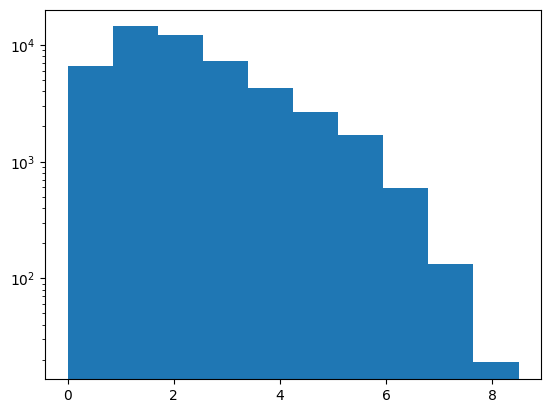

In [42]:
cluster = clusters[0]
degrees = np.array(g.degree(cluster))
print(np.mean(degrees))
plt.hist(np.log(degrees))
# plt.xscale("log")

In [43]:
np.sum(degrees)/2 / len(cluster)**2

0.0003515820016414577

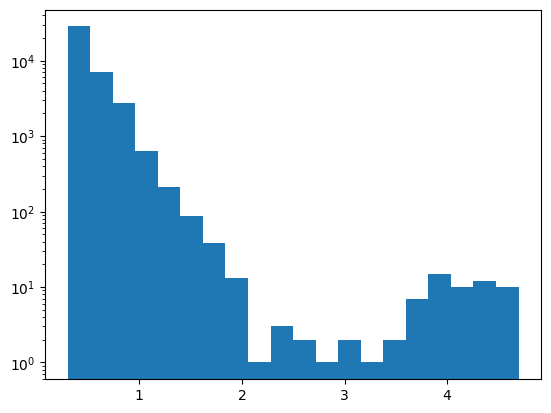

In [20]:
cluster_size = np.array([len(c) for c in clusters])
plt.hist(np.log10(cluster_size),bins=20)
plt.yscale("log")

In [21]:
np.mean(cluster_size[cluster_size>10**4])

24962.545454545456

In [22]:
# Initialize the count
edges_between_clusters = 0

# Iterate through every edge in the graph
for edge in tqdm.tqdm(g.es):
    # Get the source and target vertices of the edge
    source_vertex = edge.source
    target_vertex = edge.target

    # If the source and target vertices are in different clusters, increment the count
    if clusters.membership[source_vertex] != clusters.membership[target_vertex]:
        edges_between_clusters += 1

print(f"The number of edges between clusters is {edges_between_clusters} / {len(g.es)}")

  0%|                              | 42320/11744500 [03:38<16:47:59, 193.49it/s]


KeyboardInterrupt: 